# Discovering Dynamic Patterns from Coronavirus Data using Dynamic Mode Decomposition with Control: World Data

## Import Data

In [1]:
# package imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from pydmd import DMD
from datetime import timedelta, date, datetime
from urllib.request import urlopen
import json
import plotly.express as px

In [2]:
# import time_series_covid19_confirmed_global.csv
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url, error_bad_lines=False)

In [3]:
# import time_series_covid19_deaths_global.csv
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
deaths = pd.read_csv(url, error_bad_lines=False)

In [4]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
0,NaN,Afghanistan,33.00000,65.000000,0,0,0,0,0,0,...,110,120,170,174,237,273,281,299,349,367
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,197,212,223,243,259,277,304,333,361,377
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,454,511,584,716,847,986,1171,1251,1320,1423
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,308,334,370,376,390,428,439,466,501,525
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,5,7,7,7,8,8,8,10,14,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Falkland Islands (Islas Malvinas),United Kingdom,-51.79630,-59.523600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,2
259,Saint Pierre and Miquelon,France,46.88520,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
260,NaN,South Sudan,6.87700,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
261,NaN,Western Sahara,24.21550,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,4


In [5]:
deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
0,NaN,Afghanistan,33.00000,65.000000,0,0,0,0,0,0,...,4,4,4,4,4,6,6,7,7,11
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,10,10,11,15,15,16,17,20,20,21
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,29,31,35,44,58,86,105,130,152,173
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,3,6,8,12,14,15,16,17,18,21
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Falkland Islands (Islas Malvinas),United Kingdom,-51.79630,-59.523600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259,Saint Pierre and Miquelon,France,46.88520,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,NaN,South Sudan,6.87700,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,NaN,Western Sahara,24.21550,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


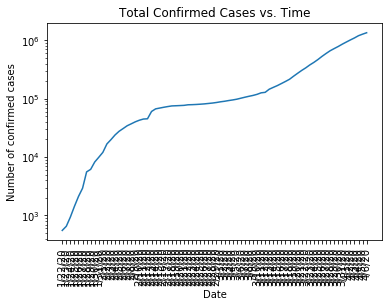

In [6]:
# plot confirmed cases vs. time
plt.title('Total Confirmed Cases vs. Time')

plt.plot(confirmed.loc[:,'1/22/20':].sum())

plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.yscale('log')
plt.xticks(rotation='vertical')

plt.show()

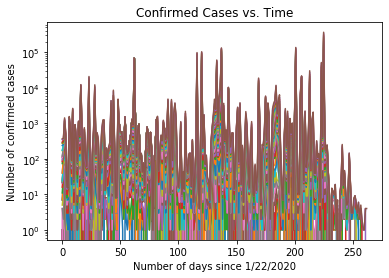

In [7]:
# plot confirmed cases vs. time
plt.title('Confirmed Cases vs. Time')

plt.plot(confirmed.loc[:,'1/22/20':])

plt.xlabel('Number of days since 1/22/2020')
plt.ylabel('Number of confirmed cases')
plt.yscale('log')

plt.show()

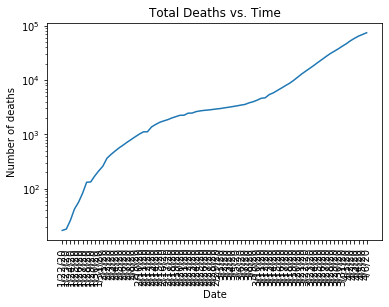

In [8]:
# plot confirmed cases vs. time
plt.title('Total Deaths vs. Time')

plt.plot(deaths.loc[:,'1/22/20':].sum())

plt.xlabel('Date')
plt.ylabel('Number of deaths')
plt.yscale('log')
plt.xticks(rotation='vertical')

plt.show()

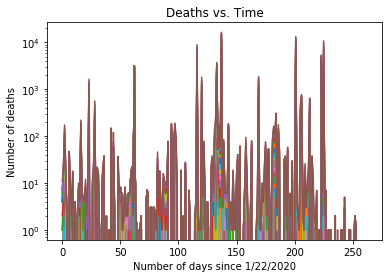

In [9]:
# plot confirmed cases vs. time
plt.title('Deaths vs. Time')

plt.plot(deaths.loc[ :,'1/22/20':])

plt.xlabel('Number of days since 1/22/2020')
plt.ylabel('Number of deaths')
plt.yscale('log')

plt.show()

## Normalize each location’s time series to account for larger population centers

subtract mean from time series and set variance to one

In [50]:
idx = pd.IndexSlice

# confirmed cases normalized
data = confirmed.loc[ :,'1/22/20':] # select all date ranges
scaledDataConfirmed = preprocessing.scale(np.transpose(data)) # Scaled data has zero mean and unit variance
#confirmed.loc[ idx[:,'1/22/20':]] = scaledDataConfirmed

# deaths normalized
data = deaths.loc[ :,'1/22/20':] # select all date ranges
scaledDataDeaths = preprocessing.scale(np.transpose(data)) # Scaled data has zero mean and unit variance
#deaths.loc[ idx[:,'1/22/20':]] = scaledDataDeaths

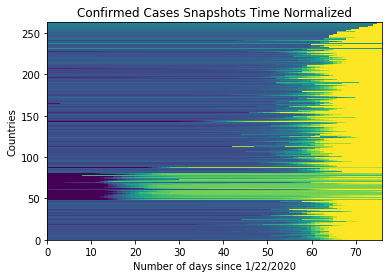

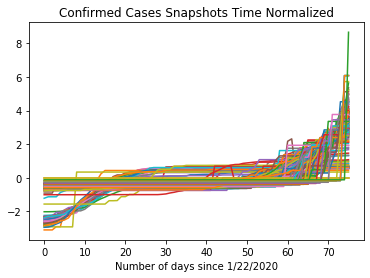

In [55]:
# plot normalized data snapshots
plt.title('Confirmed Cases Snapshots Time Normalized')
plt.pcolor(np.transpose(scaledDataConfirmed), vmin=-1, vmax=1)
plt.xlabel('Number of days since 1/22/2020')
plt.ylabel('Countries')
plt.show()

plt.title('Confirmed Cases Snapshots Time Normalized')
plt.plot(scaledDataConfirmed)
plt.xlabel('Number of days since 1/22/2020')
plt.show()

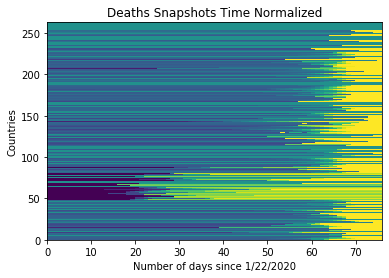

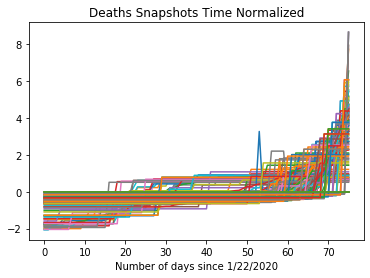

In [56]:
plt.title('Deaths Snapshots Time Normalized')

plt.pcolor(np.transpose(scaledDataDeaths), vmin=-1, vmax=1)
plt.xlabel('Number of days since 1/22/2020')
plt.ylabel('Countries')
plt.show()

plt.title('Deaths Snapshots Time Normalized')
plt.plot(scaledDataDeaths)
plt.xlabel('Number of days since 1/22/2020')
plt.show()

## Take DMD

In [66]:
dmd = DMD()
dmd.fit(scaledDataConfirmed.T)


Eigenvalue (-0.8920353000550076+0j): distance from unit circle 0.20427302345577247
Eigenvalue (-0.7856525458371397+0.2772485878879243j): distance from unit circle 0.305883297733773
Eigenvalue (-0.7856525458371397-0.2772485878879243j): distance from unit circle 0.305883297733773
Eigenvalue (-0.6910594375496556+0.5379738649932935j): distance from unit circle 0.23302097435773128
Eigenvalue (-0.6910594375496556-0.5379738649932935j): distance from unit circle 0.23302097435773128
Eigenvalue (-0.5184746604937214+0.7390462354062188j): distance from unit circle 0.18499468835781618
Eigenvalue (-0.5184746604937214-0.7390462354062188j): distance from unit circle 0.18499468835781618
Eigenvalue (-0.2139658045937759+0.8421613164233999j): distance from unit circle 0.2449829515845443
Eigenvalue (-0.2139658045937759-0.8421613164233999j): distance from unit circle 0.2449829515845443
Eigenvalue (0.033523217195658234+0.8685023331259091j): distance from unit circle 0.24457989126370516
Eigenvalue (0.03352321

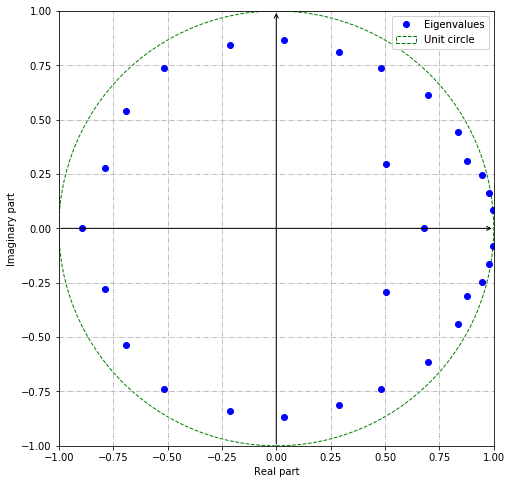

In [67]:
for eig in dmd.eigs:
    print('Eigenvalue {}: distance from unit circle {}'.format(eig, np.abs(eig.imag**2+eig.real**2 - 1)))

dmd.plot_eigs(show_axes=True, show_unit_circle=True)

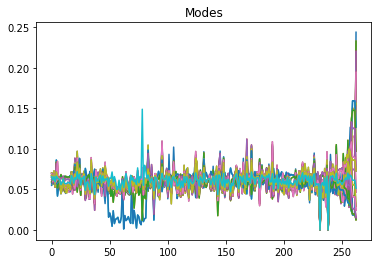

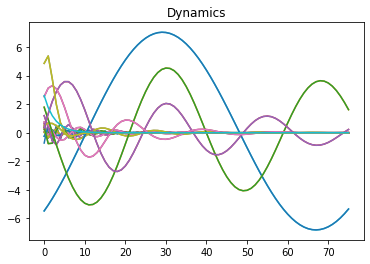

In [73]:
# modes for each date and country
for mode in dmd.modes.T:
    plt.plot(abs(mode.real))
    plt.title('Modes')
plt.show()


for dynamic in dmd.dynamics:
    plt.plot(dynamic.real)
    plt.title('Dynamics')
plt.show()


In [69]:
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
df = confirmed
fig = px.choropleth(df,    locations='Country/Region',  
                           color=abs(mode.real),
                           range_color=(0, 1),
                           scope="world",
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()